## Initial import that the team agreed upon regardless of what will be used

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
from pprint import pprint


-----------------------------------------------
## Pulling in the data set and prepping

### The goal for this section is to find the Lego set categories that showed up the most for each country, regardless of rating.

### The assumption is that these were the best selling categories.
-----------------------------------------------

In [2]:
#Retrieving CSV file
#We're only looking at 2013 and greater
#We're not using Japan
df = pd.read_csv("Dataset/lego_no_review_df.csv")
df = df[df['year'] >= 2013]
df = df[df['marketplace'] != 'JP']
#df = df.reset_index(drop=True)
df.count()

Unnamed: 0           125127
marketplace          125127
customer_id          125127
review_id            125127
product_id           125127
product_parent       125127
product_title        125127
star_rating          125127
helpful_votes        125127
total_votes          125127
vine                 125127
verified_purchase    125127
review_headline      125127
review_date          125127
year                 125127
dtype: int64

In [3]:
#Count of records for each country
marketplace_df = df.groupby('marketplace')['marketplace'].count()
print(marketplace_df)

marketplace
DE       914
FR      3843
UK      8710
US    111660
Name: marketplace, dtype: int64


-----------------------------------------------
## Beginning of the US data pull

The below steps were mirrored for each country.
-----------------------------------------------

In [4]:
#Grabbing the US only and visually comparing the count to cell 3
US_only_criteria = df[df['marketplace'] =='US']
US_only_criteria.count()

Unnamed: 0           111660
marketplace          111660
customer_id          111660
review_id            111660
product_id           111660
product_parent       111660
product_title        111660
star_rating          111660
helpful_votes        111660
total_votes          111660
vine                 111660
verified_purchase    111660
review_headline      111660
review_date          111660
year                 111660
dtype: int64

In [5]:
#Setting up the data counts and product titles
#creating new DF with only product title and count
#Sorting from High to Low
#Cleaning up the indexes
#For this we decided to only use the 10 products with the most counts
#Since we don't have sales data, we're making an assumption that
#the most reviews are sold the most, regardless of rating
US_title_group = US_only_criteria.groupby(['product_title'])['product_title'].count()
US_title_group_df = pd.DataFrame({'Product Title':US_title_group.index, 'Count':US_title_group.values})
US_title_group_df = US_title_group_df.sort_values(by='Count',ascending=False)
US_title_group_df = US_title_group_df.reset_index(drop=True)
US_title_group_df2 = US_title_group_df.head(10)

US_title_group_df2

,Product Title,Count
0,"LEGO Minecraft, Micro World 21102 (Discontinue...",2138
1,LEGO The DeLorean Time Machine Building Set 21...,1814
2,LEGO Minecraft Micro World The Village 21105 (...,1446
3,LEGO Minecraft The Nether 21106,1360
4,"LEGO 626 Green Building Plate (10"" x 10"") (Dis...",1056
5,LEGO Ghostbusters Ecto-1 21108,1046
6,LEGO Ultimate Building Set - 405 Pieces (6166)...,813
7,LEGO Bricks & More Builders of Tomorrow Set 61...,787
8,LEGO Creator Volkswagen T1 Camper Van 10220 (D...,670
9,LEGO Friends Dolphin Cruiser Building Set 4101...,641


In [6]:
#Adding a new column with Categories
#Most of the Lego categories come from the title or the box art
#Was unable to find a way to systematically pull this data.
US_title_group_df2['Categories'] = (['Minecraft','Ideas','Minecraft','Minecraft','Parts','Ideas',
                                    'Builders','Builders','Creator','Friends'])

US_title_group_df2

C:\Users\ahumb\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Product Title,Count,Categories
0,"LEGO Minecraft, Micro World 21102 (Discontinue...",2138,Minecraft
1,LEGO The DeLorean Time Machine Building Set 21...,1814,Ideas
2,LEGO Minecraft Micro World The Village 21105 (...,1446,Minecraft
3,LEGO Minecraft The Nether 21106,1360,Minecraft
4,"LEGO 626 Green Building Plate (10"" x 10"") (Dis...",1056,Parts
5,LEGO Ghostbusters Ecto-1 21108,1046,Ideas
6,LEGO Ultimate Building Set - 405 Pieces (6166)...,813,Builders
7,LEGO Bricks & More Builders of Tomorrow Set 61...,787,Builders
8,LEGO Creator Volkswagen T1 Camper Van 10220 (D...,670,Creator
9,LEGO Friends Dolphin Cruiser Building Set 4101...,641,Friends


In [7]:
#Grouping the categories and creating a new DF
#In the DF we put the country back in
US_title_groups = US_title_group_df2.groupby(['Categories'])['Categories'].count()
US_title_groups_df = pd.DataFrame({'Categories':US_title_groups.index, 'Category Count':US_title_groups.values})
US_title_groups_df['Country'] = (['US','US','US','US','US','US'])
US_title_groups_df


,Categories,Category Count,Country
0,Builders,2,US
1,Creator,1,US
2,Friends,1,US
3,Ideas,2,US
4,Minecraft,3,US
5,Parts,1,US


-----------------------------------------------
## The steps above were repeated 3 times each for France, the UK, and Denmark.
-----------------------------------------------

In [8]:
#Grabbing France only and visually comparing the count to cell 3
FR_only_criteria = df[df['marketplace'] =='FR']
FR_only_criteria.count()

Unnamed: 0           3843
marketplace          3843
customer_id          3843
review_id            3843
product_id           3843
product_parent       3843
product_title        3843
star_rating          3843
helpful_votes        3843
total_votes          3843
vine                 3843
verified_purchase    3843
review_headline      3843
review_date          3843
year                 3843
dtype: int64

In [9]:
FR_title_group = FR_only_criteria.groupby(['product_title'])['product_title'].count()
FR_title_group_df = pd.DataFrame({'Product Title':FR_title_group.index, 'Count':FR_title_group.values})
FR_title_group_df = FR_title_group_df.sort_values(by='Count',ascending=False)
FR_title_group_df = FR_title_group_df.reset_index(drop=True)
FR_title_group_df2 = FR_title_group_df.head(10)
FR_title_group_df2

,Product Title,Count
0,LEGO Star Wars - 7965 - Jeu de Construction - ...,125
1,LEGO Star Wars - 9493 - Jeu de Construction - ...,91
2,LEGO Friends - 41015 - Jeu de Construction - L...,81
3,LEGO Star Wars - 75023 - Calendriers de l'aven...,76
4,LEGO Friends - 3315 - Jeu de Construction - La...,70
5,LEGO Technic - 9398 - Jeu de Construction - Le...,64
6,LEGO - 7499 - City - Jeu de construction - Rai...,59
7,LEGO Technic - 9397 - Jeu de Construction - Le...,56
8,LEGO Creator - 10220 - Jeu de Construction - L...,56
9,LEGO Friends - 41008 - Jeu de Construction - L...,53


In [10]:
FR_title_group_df2['Categories'] = (['Star Wars','Star Wars','Friends','Star Wars','Friends','Technic',
                                    'City','Technic','Creator','Friends'])

FR_title_group_df2

C:\Users\ahumb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Product Title,Count,Categories
0,LEGO Star Wars - 7965 - Jeu de Construction - ...,125,Star Wars
1,LEGO Star Wars - 9493 - Jeu de Construction - ...,91,Star Wars
2,LEGO Friends - 41015 - Jeu de Construction - L...,81,Friends
3,LEGO Star Wars - 75023 - Calendriers de l'aven...,76,Star Wars
4,LEGO Friends - 3315 - Jeu de Construction - La...,70,Friends
5,LEGO Technic - 9398 - Jeu de Construction - Le...,64,Technic
6,LEGO - 7499 - City - Jeu de construction - Rai...,59,City
7,LEGO Technic - 9397 - Jeu de Construction - Le...,56,Technic
8,LEGO Creator - 10220 - Jeu de Construction - L...,56,Creator
9,LEGO Friends - 41008 - Jeu de Construction - L...,53,Friends


In [11]:
FR_title_groups = FR_title_group_df2.groupby(['Categories'])['Categories'].count()
FR_title_groups_df = pd.DataFrame({'Categories':FR_title_groups.index, 'Category Count':FR_title_groups.values})
FR_title_groups_df['Country'] = (['FR','FR','FR','FR','FR'])
FR_title_groups_df

,Categories,Category Count,Country
0,City,1,FR
1,Creator,1,FR
2,Friends,3,FR
3,Star Wars,3,FR
4,Technic,2,FR


In [12]:
#Grabbing the UK only and visually comparing the count to cell 3
UK_only_criteria = df[df['marketplace'] =='UK']
UK_only_criteria.count()

Unnamed: 0           8710
marketplace          8710
customer_id          8710
review_id            8710
product_id           8710
product_parent       8710
product_title        8710
star_rating          8710
helpful_votes        8710
total_votes          8710
vine                 8710
verified_purchase    8710
review_headline      8710
review_date          8710
year                 8710
dtype: int64

In [13]:
UK_title_group = UK_only_criteria.groupby(['product_title'])['product_title'].count()
UK_title_group_df = pd.DataFrame({'Product Title':UK_title_group.index, 'Count':UK_title_group.values})
UK_title_group_df = UK_title_group_df.sort_values(by='Count',ascending=False)
UK_title_group_df = UK_title_group_df.reset_index(drop=True)
UK_title_group_df2 = UK_title_group_df.head(10)
UK_title_group_df2

,Product Title,Count
0,LEGO Star Wars 75056 LEGO Star Wars Advent Cal...,243
1,LEGO City 60063 LEGO City Advent Calendar,215
2,LEGO Technic 42002: Hovercraft,161
3,LEGO Friends 41015 Dolphin Cruiser,160
4,LEGO Friends 3315: Olivia's House,159
5,LEGO Friends 41008: Heartlake City Pool,153
6,LEGO Star Wars 75023: Advent Calendar 2013,137
7,LEGO Games 3844: Creationary,125
8,LEGO Star Wars 7965: Millennium Falcon,125
9,LEGO Star Wars 9493: X-Wing Starfighter,120


In [14]:
UK_title_group_df2['Categories'] = (['Star Wars','City','Technic','Friends','Friends','Friends',
                                    'Star Wars','Games','Star Wars','Star Wars'])
UK_title_group_df2

C:\Users\ahumb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Product Title,Count,Categories
0,LEGO Star Wars 75056 LEGO Star Wars Advent Cal...,243,Star Wars
1,LEGO City 60063 LEGO City Advent Calendar,215,City
2,LEGO Technic 42002: Hovercraft,161,Technic
3,LEGO Friends 41015 Dolphin Cruiser,160,Friends
4,LEGO Friends 3315: Olivia's House,159,Friends
5,LEGO Friends 41008: Heartlake City Pool,153,Friends
6,LEGO Star Wars 75023: Advent Calendar 2013,137,Star Wars
7,LEGO Games 3844: Creationary,125,Games
8,LEGO Star Wars 7965: Millennium Falcon,125,Star Wars
9,LEGO Star Wars 9493: X-Wing Starfighter,120,Star Wars


In [15]:
UK_title_groups = UK_title_group_df2.groupby(['Categories'])['Categories'].count()
UK_title_groups_df = pd.DataFrame({'Categories':UK_title_groups.index, 'Category Count':UK_title_groups.values})
UK_title_groups_df['Country'] = (['UK','UK','UK','UK','UK'])
UK_title_groups_df

,Categories,Category Count,Country
0,City,1,UK
1,Friends,3,UK
2,Games,1,UK
3,Star Wars,4,UK
4,Technic,1,UK


In [16]:
#Grabbing Denmark only and visually comparing the count to cell 3
DE_only_criteria = df[df['marketplace'] =='DE']
DE_only_criteria.count()

Unnamed: 0           914
marketplace          914
customer_id          914
review_id            914
product_id           914
product_parent       914
product_title        914
star_rating          914
helpful_votes        914
total_votes          914
vine                 914
verified_purchase    914
review_headline      914
review_date          914
year                 914
dtype: int64

In [17]:
DE_title_group = DE_only_criteria.groupby(['product_title'])['product_title'].count()
DE_title_group_df = pd.DataFrame({'Product Title':DE_title_group.index, 'Count':DE_title_group.values})
DE_title_group_df = DE_title_group_df.sort_values(by='Count',ascending=False)
DE_title_group_df = DE_title_group_df.reset_index(drop=True)
DE_title_group_df2 = DE_title_group_df.head(10)
DE_title_group_df2
#DE_title_group_df.head(5)

,Product Title,Count
0,LEGO Technic 8110 - Unimog U400,139
1,LEGO Creator 10220 - Volkswagen T1 Campingbus,128
2,LEGO Technic 42030 - VOLVO L350F Radlader,79
3,LEGO DUPLO 10505 - Familienhaus,77
4,LEGO City 7499 - Flexible Schienen,75
5,LEGO Technic 8070 - Super Car,71
6,LEGO 9496 - Star Wars Desert Skiff,35
7,LEGO Friends 41006 - Heartlake Bäckerei,28
8,LEGO 21103 zurück in die zukunft – Der Delorea...,25
9,LEGO Minifiguren 853340 Hochzeits-Set Tischdek...,24


In [18]:
DE_title_group_df2['Categories'] = (['Technic','Creator','Technic','DUPLO','City','Technic',
                                    'Star Wars','Friends','Creator','Ideas'])
DE_title_group_df2

C:\Users\ahumb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Product Title,Count,Categories
0,LEGO Technic 8110 - Unimog U400,139,Technic
1,LEGO Creator 10220 - Volkswagen T1 Campingbus,128,Creator
2,LEGO Technic 42030 - VOLVO L350F Radlader,79,Technic
3,LEGO DUPLO 10505 - Familienhaus,77,DUPLO
4,LEGO City 7499 - Flexible Schienen,75,City
5,LEGO Technic 8070 - Super Car,71,Technic
6,LEGO 9496 - Star Wars Desert Skiff,35,Star Wars
7,LEGO Friends 41006 - Heartlake Bäckerei,28,Friends
8,LEGO 21103 zurück in die zukunft – Der Delorea...,25,Creator
9,LEGO Minifiguren 853340 Hochzeits-Set Tischdek...,24,Ideas


In [19]:
DE_title_groups = DE_title_group_df2.groupby(['Categories'])['Categories'].count()
DE_title_groups_df = pd.DataFrame({'Categories':DE_title_groups.index, 'Category Count':DE_title_groups.values})
DE_title_groups_df['Country'] = (['DE','DE','DE','DE','DE','DE','DE'])
DE_title_groups_df

,Categories,Category Count,Country
0,City,1,DE
1,Creator,2,DE
2,DUPLO,1,DE
3,Friends,1,DE
4,Ideas,1,DE
5,Star Wars,1,DE
6,Technic,3,DE


-----------------------------------------------
## This section combines the data frames into a single data frame.

### These were part of a graph that we decided not to use.
-----------------------------------------------

In [20]:
#combined_df = pd.concat([US_title_groups_df, FR_title_groups_df, UK_title_groups_df, DE_title_groups_df])
#combined_df = combined_df.sort_values(by=['Categories','Country'],ascending=True)
#combined_df = combined_df.reset_index(drop=True)
#combined_df.head(5)

In [21]:
combined_df = pd.concat([US_title_groups_df, FR_title_groups_df, UK_title_groups_df, DE_title_groups_df])
combined_df = combined_df.sort_values(by=['Categories','Category Count'],ascending=False)
combined_df = combined_df.reset_index(drop=True)
combined_df = combined_df.set_index('Categories')
combined_df.head(5)

,Category Count,Country
Categories,,
Technic,3,DE
Technic,2,FR
Technic,1,UK
Star Wars,4,UK
Star Wars,3,FR


-----------------------------------------------
## Setting up and creating the graphs for each country.
-----------------------------------------------

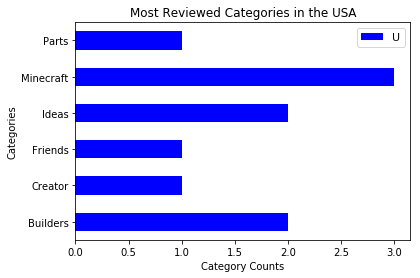

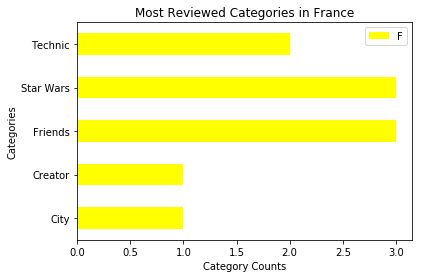

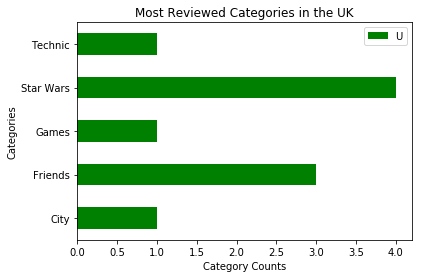

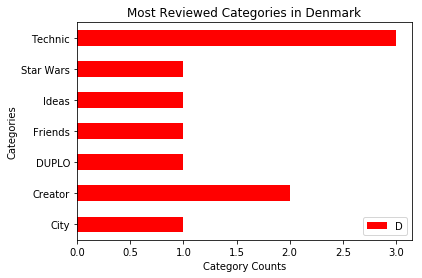

In [22]:
# Each graph follows the same setup.

US_title_groups_df.plot(kind='barh',x='Categories',y='Category Count',color='blue').legend('US',prop={'size': 11})
plt.xlabel('Category Counts')
plt.ylabel('Categories')
plt.title('Most Reviewed Categories in the USA')
plt.savefig('Images/Most Reviewed Categories in the USA.png')

FR_title_groups_df.plot(kind='barh',x='Categories',y='Category Count',color='yellow').legend('FR')
plt.xlabel('Category Counts')
plt.ylabel('Categories')
plt.title('Most Reviewed Categories in France')
plt.savefig('Images/Most Reviewed Categories in France.png')

UK_title_groups_df.plot(kind='barh',x='Categories',y='Category Count',color='green').legend('UK')
plt.xlabel('Category Counts')
plt.ylabel('Categories')
plt.title('Most Reviewed Categories in the UK')
plt.savefig('Images/Most Reviewed Categories in the UK.png')

DE_title_groups_df.plot(kind='barh',x='Categories',y='Category Count',color='red').legend('DE')
plt.xlabel('Category Counts')
plt.ylabel('Categories')
plt.title('Most Reviewed Categories in Denmark')
plt.savefig('Images/Most Reviewed Categories in Denmark.png')
#plt.legend(loc='best')